In [ ]:
#%pip install pystan

In [1]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings

c:\Users\anshh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('./cisco_dataset.csv')
df.head()


,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017


In [4]:
df.dtypes

Business Unit     object
Product Family    object
PLID              object
Fiscal Quarter    object
Fiscal Month      object
Booked_Qty         int64
Booking_Date      object
dtype: object

In [5]:
df.columns = ['BU','PF','PLID','FQ','FM','Order_Demand','Date']

In [6]:
df = df.drop(['FQ', 'FM'], axis=1)
df.head()

,BU,PF,PLID,Order_Demand,Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,6094,01-10-2017


<AxesSubplot:xlabel='BU', ylabel='count'>

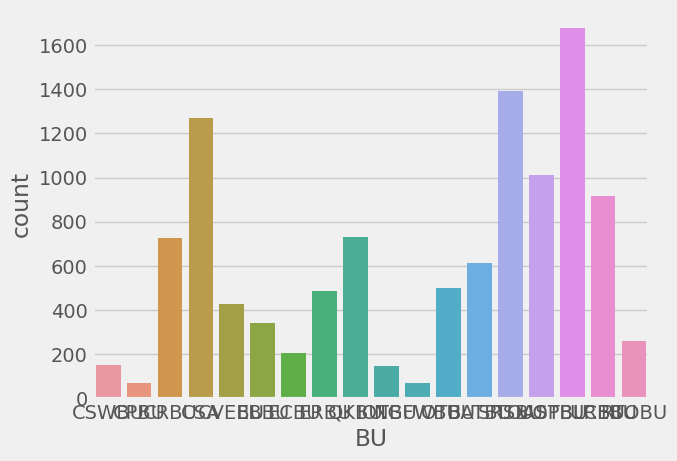

In [7]:
# Find the aggregate demand among the Buisness units
sns.countplot(x = 'BU', data = df)

In [8]:
df.BU.unique()

array(['CSWBU', 'CPBU', 'CRBU', 'CSA', 'CVEBU', 'EBBU', 'ECBU', 'ERBU',
       'QKBU', 'IOTBU', 'NGFWBU', 'OTBU', 'BATBU', 'SRSBU', 'TOASTBU',
       'UOPBLRBU', 'UCEBU', 'RTOBU'], dtype=object)

In [9]:
df = df[df['BU'] == 'UOPBLRBU']
df

,BU,PF,PLID,Order_Demand,Date
8145,UOPBLRBU,C1000,C1000-24T-4G-L,636,01-08-2021
8146,UOPBLRBU,C1000,C1000-24T-4G-L,2289,01-10-2021
8147,UOPBLRBU,C1000,C1000-24T-4G-L,2037,01-09-2021
8148,UOPBLRBU,C1000,C1000-24T-4G-L,6358,01-08-2022
8149,UOPBLRBU,C1000,C1000-24T-4G-L,10809,01-10-2022
...,...,...,...,...,...
9815,UOPBLRBU,C9400,C9410R-96U-BNDL-A,388,01-06-2020
9816,UOPBLRBU,C9400,C9410R-96U-BNDL-A,272,01-05-2020
9817,UOPBLRBU,C9400,C9410R-96U-BNDL-A,1348,01-07-2021
9818,UOPBLRBU,C9400,C9410R-96U-BNDL-A,581,01-06-2021


<AxesSubplot:xlabel='PF', ylabel='count'>

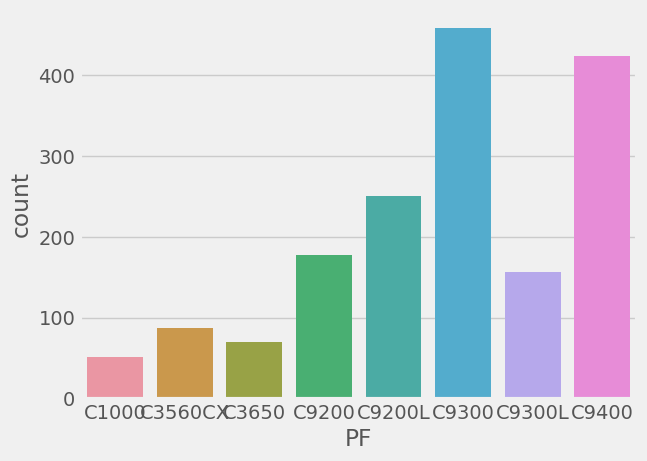

In [10]:
# Find the aggregate demand among the Buisness units
sns.countplot(x = 'PF', data = df)

In [11]:
df = df[df['PF'] == 'C9300']
df['PLID'].unique()

array(['C9300-24P', 'C9300-24T', 'C9300-24UX', 'C9300-48H', 'C9300-48P',
       'C9300-48T', 'C9300-48UN', 'C9300-48UXM', 'C9300-NM-8X'],
      dtype=object)

<AxesSubplot:xlabel='PLID', ylabel='count'>

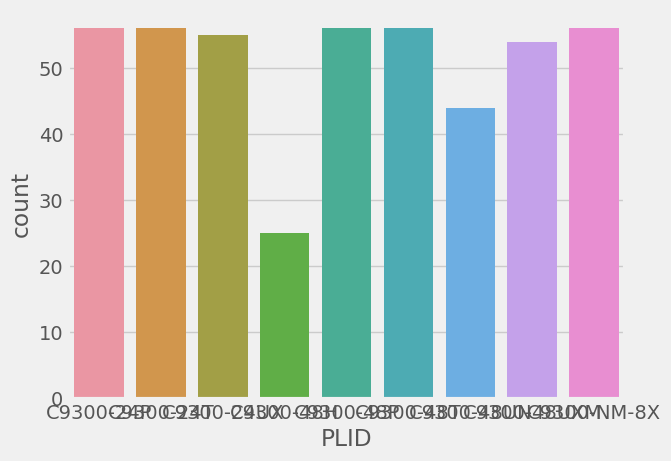

In [12]:
# Find the aggregate demand among the Buisness units
sns.countplot(x = 'PLID', data = df)

In [13]:
df['PF'].unique()

array(['C9300'], dtype=object)

In [14]:
df['PLID'].unique()

array(['C9300-24P', 'C9300-24T', 'C9300-24UX', 'C9300-48H', 'C9300-48P',
       'C9300-48T', 'C9300-48UN', 'C9300-48UXM', 'C9300-NM-8X'],
      dtype=object)

In [15]:
df = df[df['PLID'] == 'C9300-24P']
df

,BU,PF,PLID,Order_Demand,Date
8781,UOPBLRBU,C9300,C9300-24P,86,01-08-2018
8782,UOPBLRBU,C9300,C9300-24P,2253,01-10-2018
8783,UOPBLRBU,C9300,C9300-24P,169,01-09-2018
8784,UOPBLRBU,C9300,C9300-24P,2316,01-08-2019
8785,UOPBLRBU,C9300,C9300-24P,7424,01-10-2019
8786,UOPBLRBU,C9300,C9300-24P,3908,01-09-2019
8787,UOPBLRBU,C9300,C9300-24P,6220,01-08-2020
8788,UOPBLRBU,C9300,C9300-24P,7484,01-10-2020
8789,UOPBLRBU,C9300,C9300-24P,3561,01-09-2020
8790,UOPBLRBU,C9300,C9300-24P,2662,01-08-2021


In [16]:
df.drop(['BU','PF','PLID'], axis=1, inplace=True)
#df['Order_Demand'] = df11['Order_Demand'].str.replace('[^0-9-]','').apply(np.int64)
df['Date'] = pd.to_datetime(df['Date'] ,format='%d-%m-%Y')
df.sort_values(by='Date', inplace = True)
df

,Order_Demand,Date
8824,32,2017-06-01
8823,315,2017-07-01
8797,2039,2018-01-01
8812,1440,2018-02-01
8813,1222,2018-03-01
8811,3428,2018-04-01
8827,1764,2018-05-01
8826,4293,2018-06-01
8825,11734,2018-07-01
8781,86,2018-08-01


In [17]:
df11 = df.groupby('Date')['Order_Demand'].sum().reset_index()

In [18]:
from datetime import datetime
trim_date = datetime(2021, 12, 31)
df11 = df11[df11['Date'] <= trim_date]

In [19]:
df11

,Date,Order_Demand
0,2017-06-01,32
1,2017-07-01,315
2,2018-01-01,2039
3,2018-02-01,1440
4,2018-03-01,1222
5,2018-04-01,3428
6,2018-05-01,1764
7,2018-06-01,4293
8,2018-07-01,11734
9,2018-08-01,86


In [20]:
df11.set_index('Date', inplace=True)
df11

,Order_Demand
Date,
2017-06-01,32
2017-07-01,315
2018-01-01,2039
2018-02-01,1440
2018-03-01,1222
2018-04-01,3428
2018-05-01,1764
2018-06-01,4293
2018-07-01,11734


In [21]:
def create_feature(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df = create_feature(df11)
# features, Target variable
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['Demand']
df

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-01,32,3,2,6,2017,22
2017-07-01,315,5,3,7,2017,26
2018-01-01,2039,0,1,1,2018,1
2018-02-01,1440,3,1,2,2018,5
2018-03-01,1222,3,1,3,2018,9
2018-04-01,3428,6,2,4,2018,13
2018-05-01,1764,1,2,5,2018,18
2018-06-01,4293,4,2,6,2018,22
2018-07-01,11734,6,3,7,2018,26


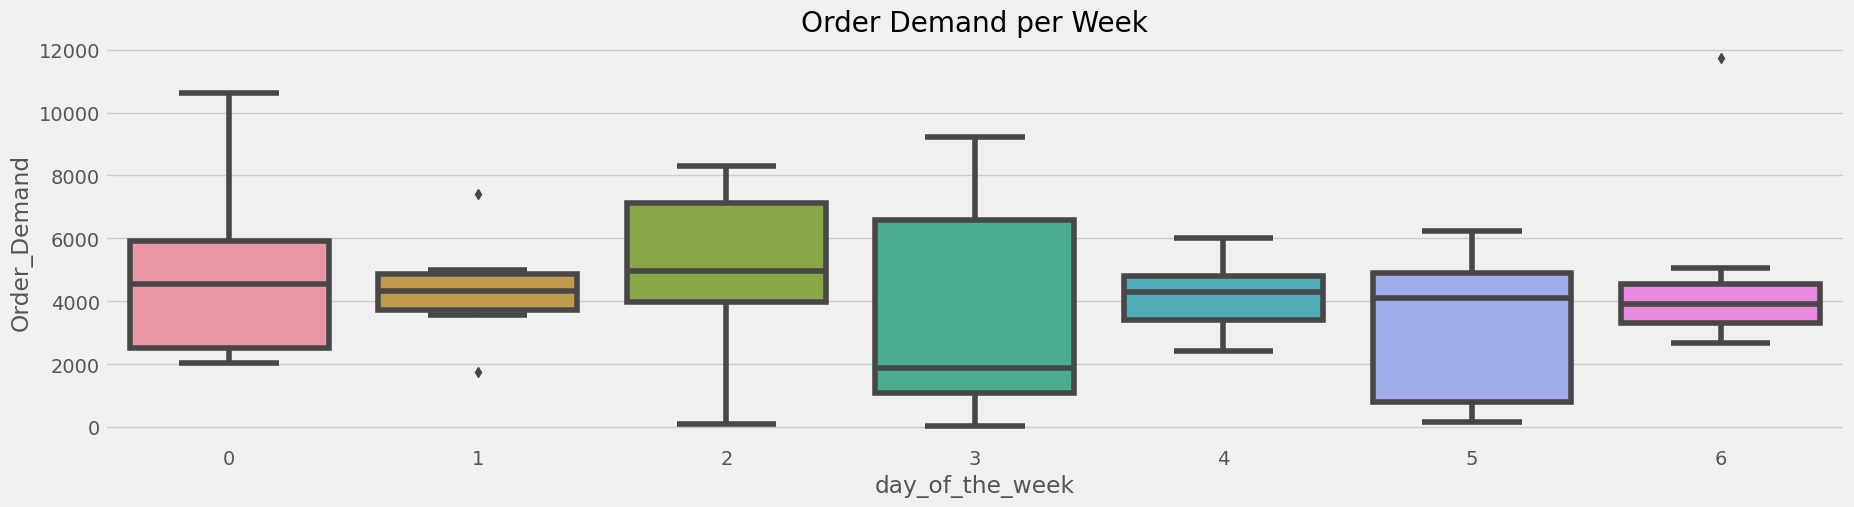

In [22]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='day_of_the_week', y='Order_Demand')
ax.set_title('Order Demand per Week')
plt.show()

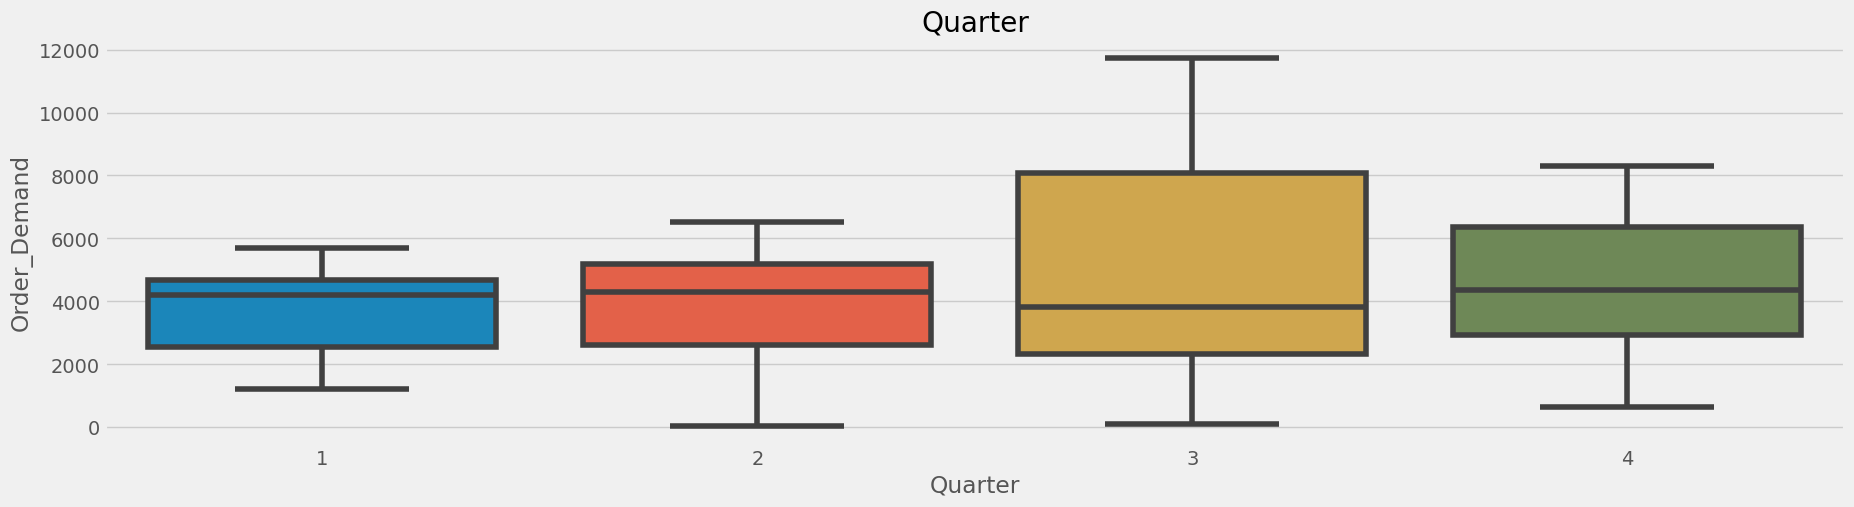

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Quarter', y='Order_Demand')
ax.set_title('Quarter')
plt.show()

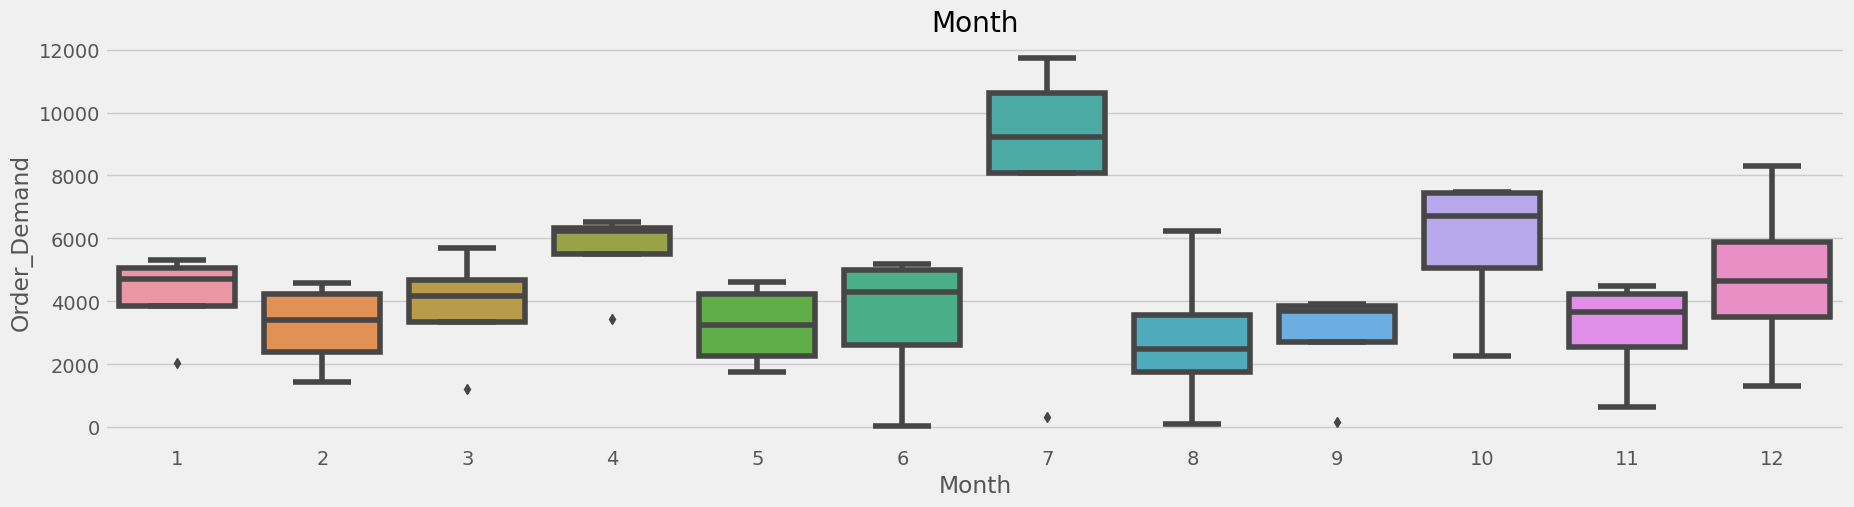

In [24]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Month', y='Order_Demand')
ax.set_title('Month')
plt.show()

In [25]:
# Resample data as Weekly 
df_week = df.resample('W').mean()

In [26]:
# df_week['Order_Demand'].plot(figsize = (15,4), title = 'Weekly Order demand')
# plt.show()

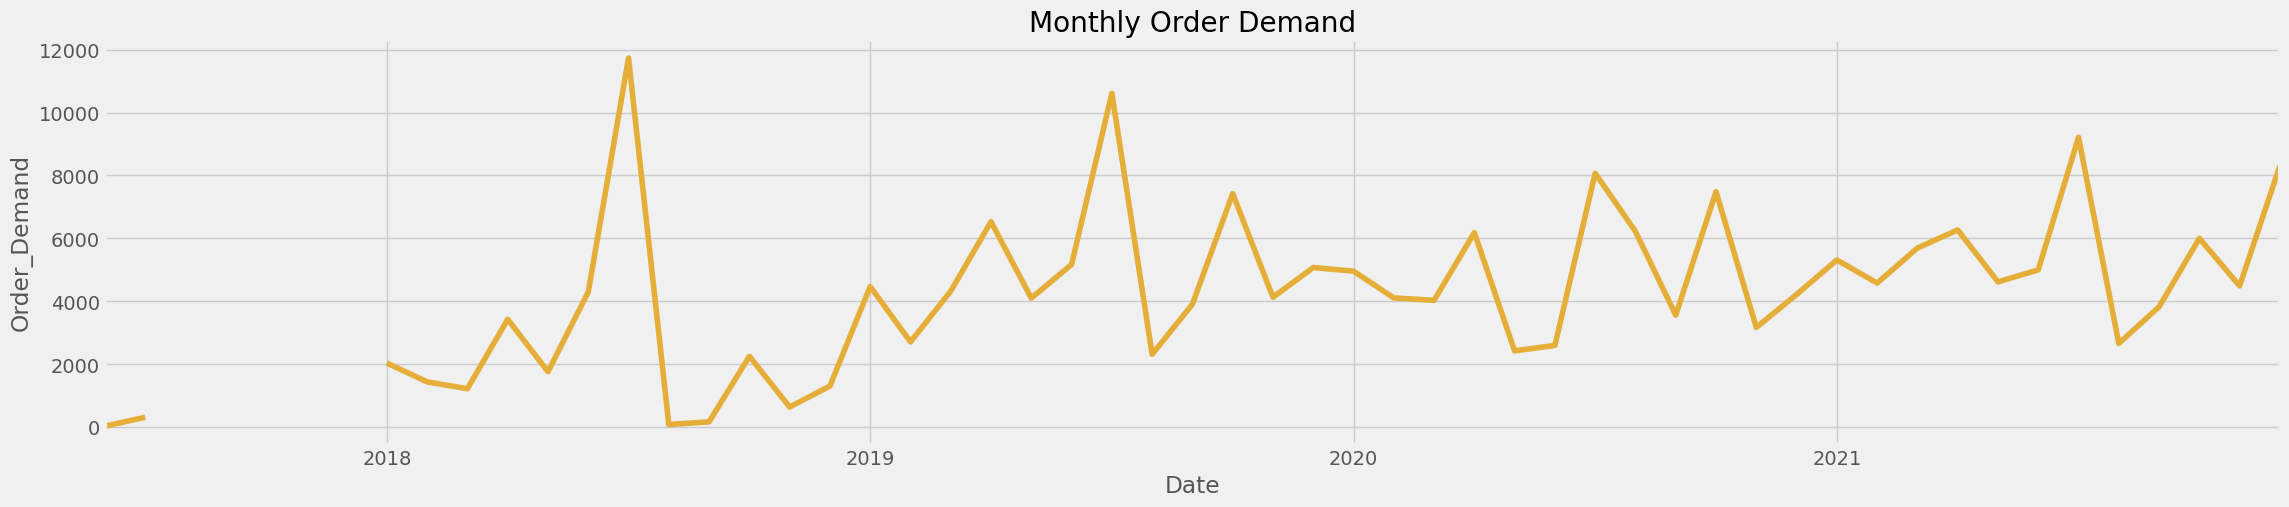

In [27]:
color_pal = sns.color_palette()
df_month = df.resample('MS').mean()
df_month.Order_Demand.plot(figsize = (25,5), title = 'Monthly Order Demand', color = color_pal[2])
plt.ylabel('Order_Demand')
plt.show()

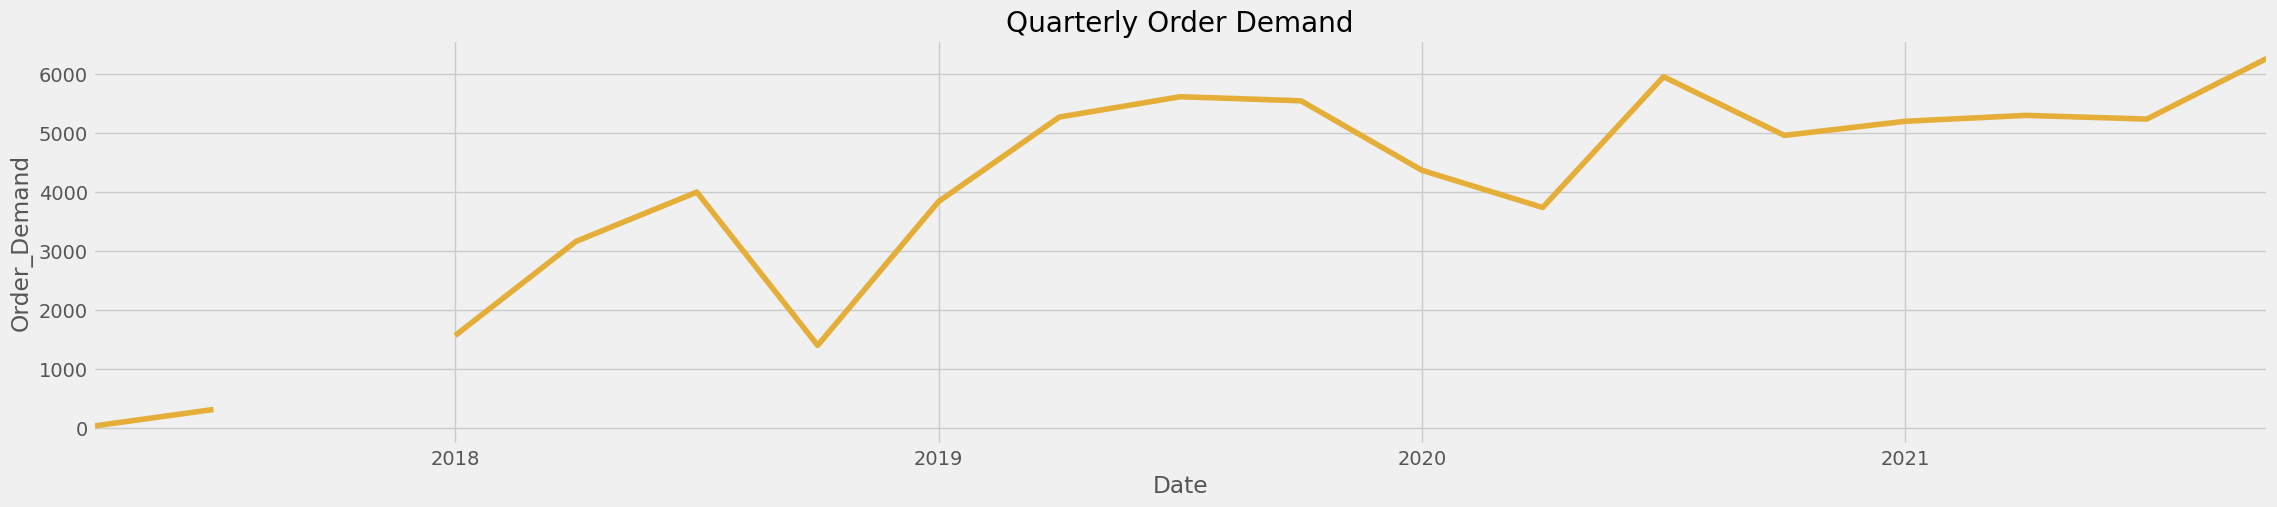

In [28]:
color_pal = sns.color_palette()
df_Q = df.resample('Q').mean()
df_Q.Order_Demand.plot(figsize = (25,5), title = 'Quarterly Order Demand', color = color_pal[2])
plt.ylabel('Order_Demand')
plt.show()

In [29]:
df_month

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-01,32.0,3.0,2.0,6.0,2017.0,22.0
2017-07-01,315.0,5.0,3.0,7.0,2017.0,26.0
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2039.0,0.0,1.0,1.0,2018.0,1.0
2018-02-01,1440.0,3.0,1.0,2.0,2018.0,5.0


In [30]:
#for fashion purposes ezez
plt.style.use('fivethirtyeight')

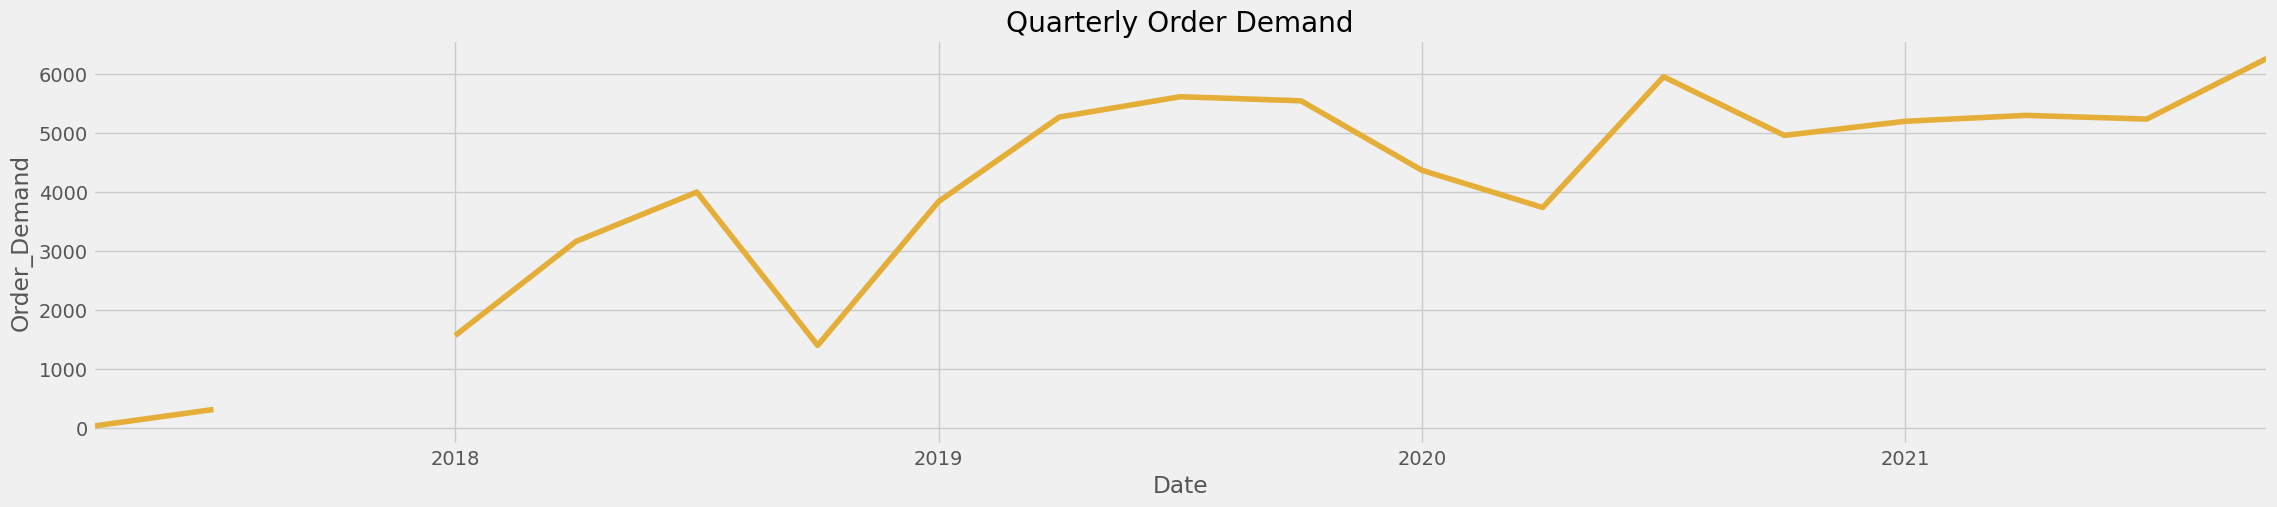

In [31]:
color_pal = sns.color_palette()
df_Q= df.resample('Q').mean()
df_Q.Order_Demand.plot(figsize = (25,5), title = 'Quarterly Order Demand', color = color_pal[2])
plt.ylabel('Order_Demand')
plt.show()

In [32]:
df['Year'].unique()

array([2017, 2018, 2019, 2020, 2021], dtype=int64)

In [ ]:
# #Seasonal decomposition using moving averages
# from pylab import rcParams
# from statsmodels.tsa.seasonal import seasonal_decompose
# rcParams['figure.figsize'] = 25, 10
# decomposition = seasonal_decompose(df_Q.Order_Demand.values, model='additive', period = 12)
                   
# fig = decomposition.plot()
# plt.show()

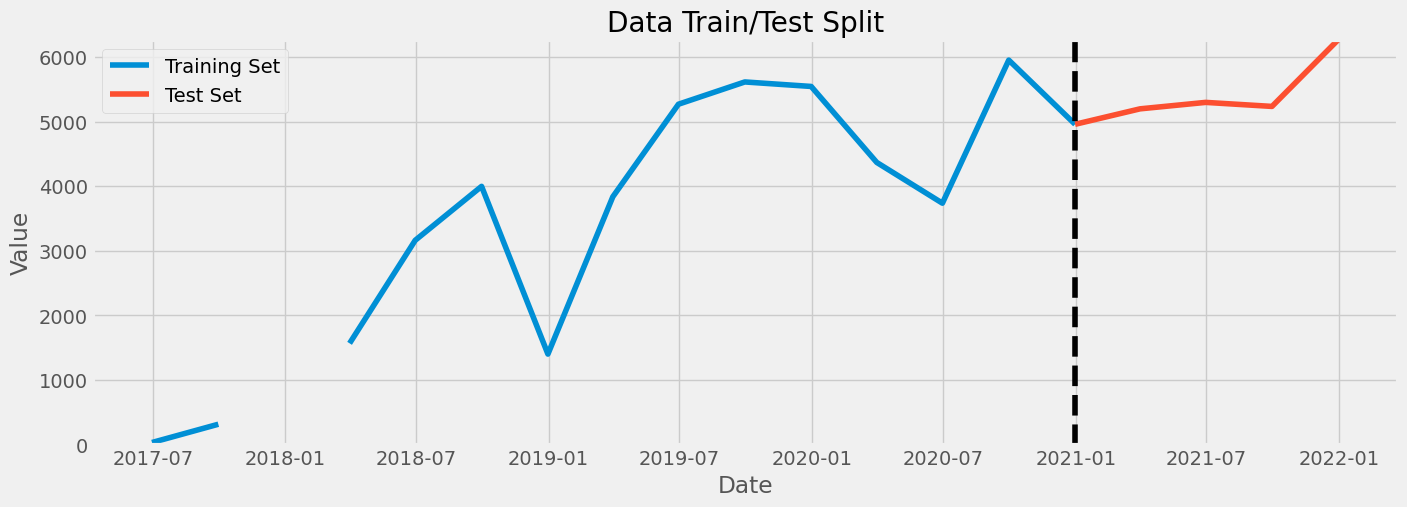

In [33]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

train_end = datetime(2020, 12, 31)
test_end = datetime(2021, 12, 31)

df_train = df_Q[:train_end]
df_test = df_Q[train_end:test_end]

fig, ax = plt.subplots(figsize=(15, 5))

# Plot training data
ax.plot(df_train.index, df_train['Order_Demand'], label='Training Set')

# Plot testing data
ax.plot(df_test.index, df_test['Order_Demand'], label='Test Set')

# Add vertical line for split point
ax.axvline(train_end, color='black', ls='--')

# Add axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set y-axis limits to be the same for both plots
ax.set_ylim([0, max(df_train['Order_Demand'].max(), df_test['Order_Demand'].max())])

# Add legend
ax.legend()

# Add title
ax.set_title('Data Train/Test Split')

plt.show()


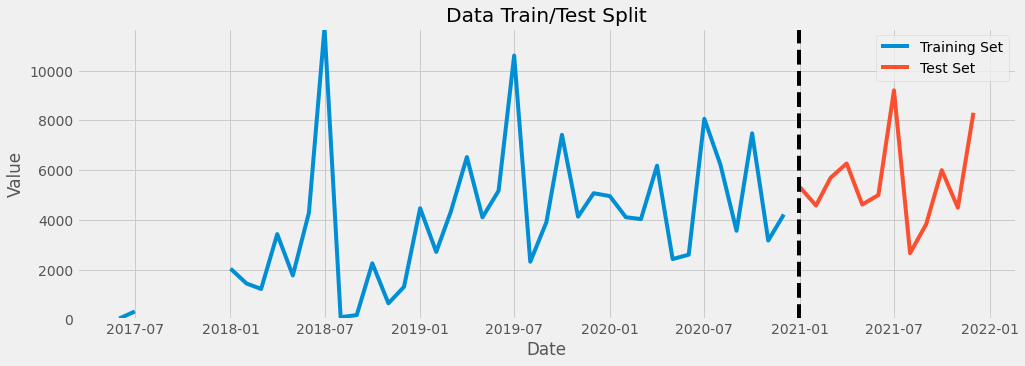

In [ ]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

train_end = datetime(2020, 12, 31)
test_end = datetime(2021, 12, 31)

df_train = df_month[:train_end]
df_test = df_month[train_end:test_end]

fig, ax = plt.subplots(figsize=(15, 5))

# Plot training data
ax.plot(df_train.index, df_train['Order_Demand'], label='Training Set')

# Plot testing data
ax.plot(df_test.index, df_test['Order_Demand'], label='Test Set')

# Add vertical line for split point
ax.axvline(train_end, color='black', ls='--')

# Add axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set y-axis limits to be the same for both plots
ax.set_ylim([0, max(df_train['Order_Demand'].max(), df_test['Order_Demand'].max())])

# Add legend
ax.legend()

# Add title
ax.set_title('Data Train/Test Split')

plt.show()


In [34]:
df_train

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-30,32.000000,3.000000,2.0,6.0,2017.0,22.000000
2017-09-30,315.000000,5.000000,3.0,7.0,2017.0,26.000000
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,1567.000000,2.000000,1.0,2.0,2018.0,5.000000
2018-06-30,3161.666667,3.666667,2.0,5.0,2018.0,17.666667
2018-09-30,3996.333333,4.333333,3.0,8.0,2018.0,30.666667
2018-12-31,1400.666667,2.666667,4.0,11.0,2018.0,44.000000
2019-03-31,3835.666667,3.000000,1.0,2.0,2019.0,5.000000
2019-06-30,5267.666667,2.333333,2.0,5.0,2019.0,18.000000


In [35]:
df_train.head()

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-30,32.000000,3.000000,2.0,6.0,2017.0,22.000000
2017-09-30,315.000000,5.000000,3.0,7.0,2017.0,26.000000
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,1567.000000,2.000000,1.0,2.0,2018.0,5.000000
2018-06-30,3161.666667,3.666667,2.0,5.0,2018.0,17.666667


In [36]:
df_train.drop(['day_of_the_week', 'Quarter','Month','Year','Week'], axis=1, inplace=True)
df_test.drop(['day_of_the_week', 'Quarter','Month','Year','Week'], axis=1, inplace=True)

In [37]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [38]:
df_train.columns = ['ds','y']
df_test.columns = ['ds','y']
df_train.head()

,ds,y
0,2017-06-30,32.000000
1,2017-09-30,315.000000
2,2017-12-31,NaN
3,2018-03-31,1567.000000
4,2018-06-30,3161.666667


In [39]:
m = Prophet()

In [40]:
m.fit(df_train)

06:31:26 - cmdstanpy - INFO - Chain [1] start processing
06:31:26 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
pred = m.predict(df_test)
pred


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-31,6275.019818,4091.223889,5243.418425,6275.019818,6275.019818,-1613.009893,-1613.009893,-1613.009893,-1613.009893,-1613.009893,-1613.009893,0.0,0.0,0.0,4662.009925
1,2021-03-31,6739.943534,6195.698555,7295.115941,6739.943532,6739.943537,-8.370650,-8.370650,-8.370650,-8.370650,-8.370650,-8.370650,0.0,0.0,0.0,6731.572884
2,2021-06-30,7210.033070,6611.020442,7718.372716,7210.033062,7210.033080,-0.581577,-0.581577,-0.581577,-0.581577,-0.581577,-0.581577,0.0,0.0,0.0,7209.451493
3,2021-09-30,7685.288425,7797.205082,8944.682484,7685.288408,7685.288444,682.698608,682.698608,682.698608,682.698608,682.698608,682.698608,0.0,0.0,0.0,8367.987033
4,2021-12-31,8160.543780,6680.259537,7813.197754,8160.543752,8160.543810,-934.647767,-934.647767,-934.647767,-934.647767,-934.647767,-934.647767,0.0,0.0,0.0,7225.896013


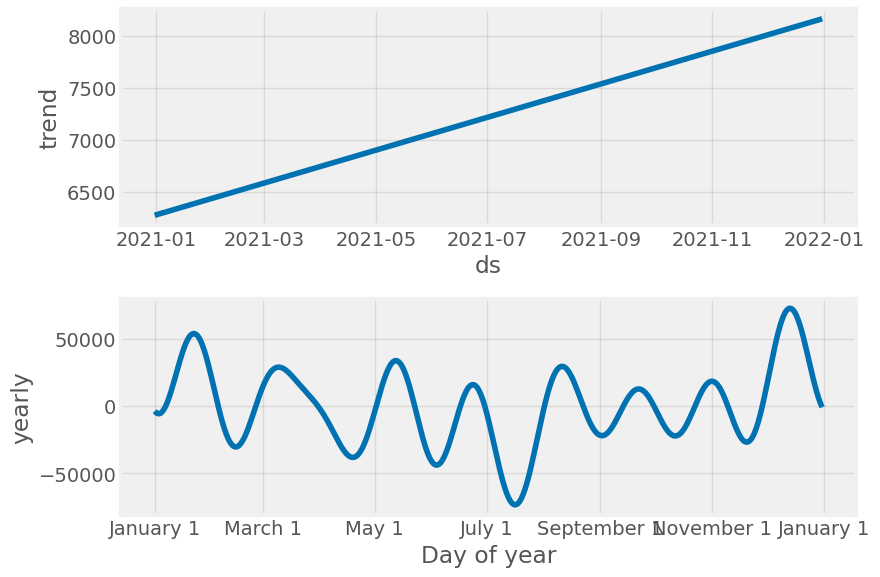

In [42]:
fig = m.plot_components(pred)
plt.show()

In [43]:
df_pred = pred[['ds', 'yhat']]
df_test

,ds,y
0,2020-12-31,4957.000000
1,2021-03-31,5196.000000
2,2021-06-30,5296.000000
3,2021-09-30,5233.666667
4,2021-12-31,6268.000000


In [44]:
df_pred = df_pred.set_index('ds')
df_test = df_test.set_index('ds')

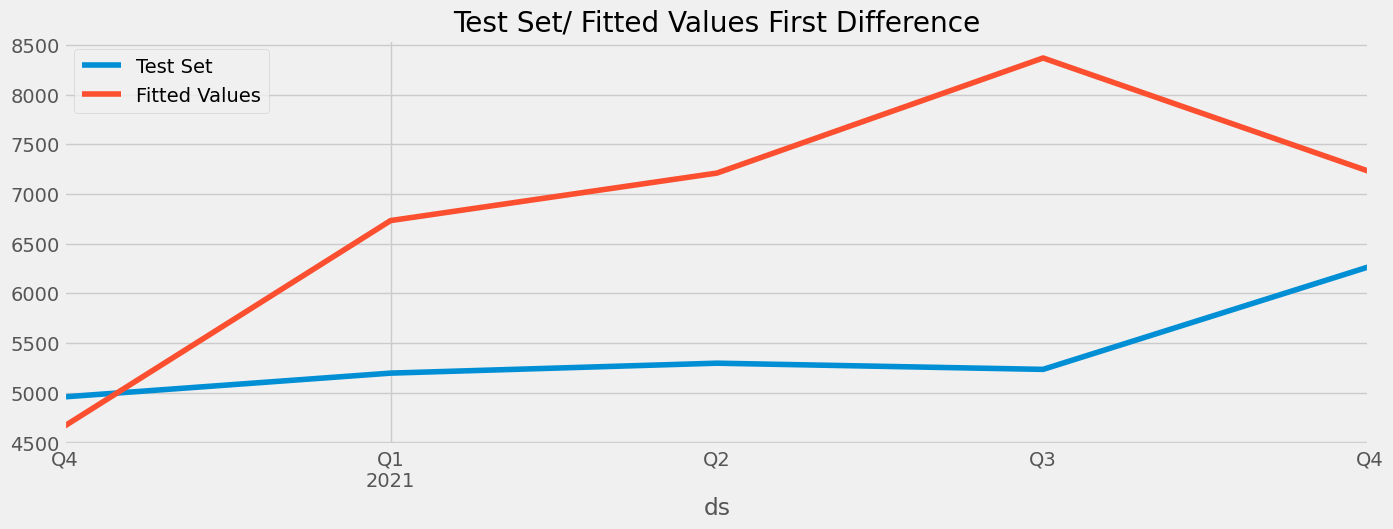

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
df_pred.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [46]:
np.sqrt(mean_squared_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat']))

1835.6376969182634

In [47]:
mean_absolute_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat'])

1567.246166176657

In [48]:
mean_absolute_percentage_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat'])

0.2936081354297938

In [51]:
future = m.make_future_dataframe(periods=60, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-06-30,-337.810173,-934.679134,205.741771
1,2017-09-30,820.725367,253.974834,1375.183752
2,2017-12-31,-321.365654,-862.539820,231.383418
3,2018-03-31,1524.915072,1014.994703,2080.765310
4,2018-06-30,2697.440433,2121.138440,3227.175297


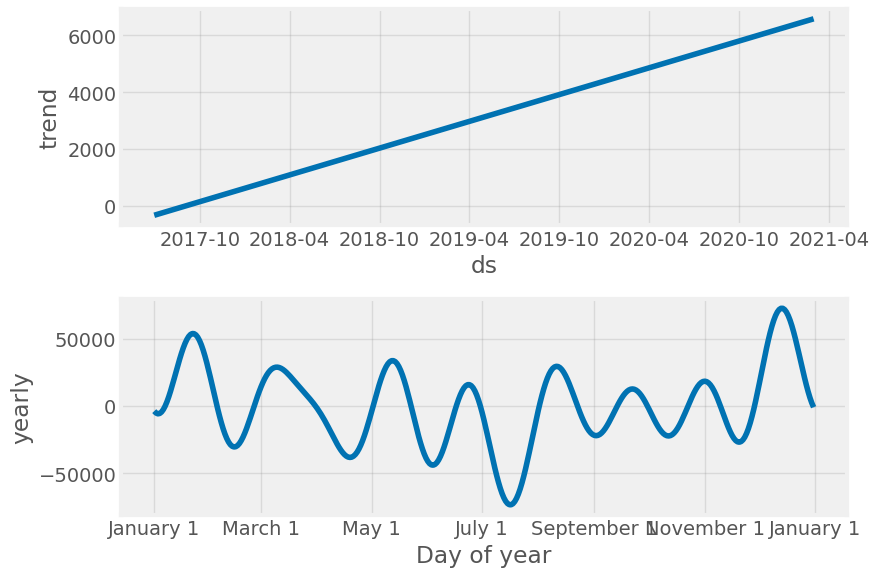

In [53]:
fig = m.plot_components(forecast)

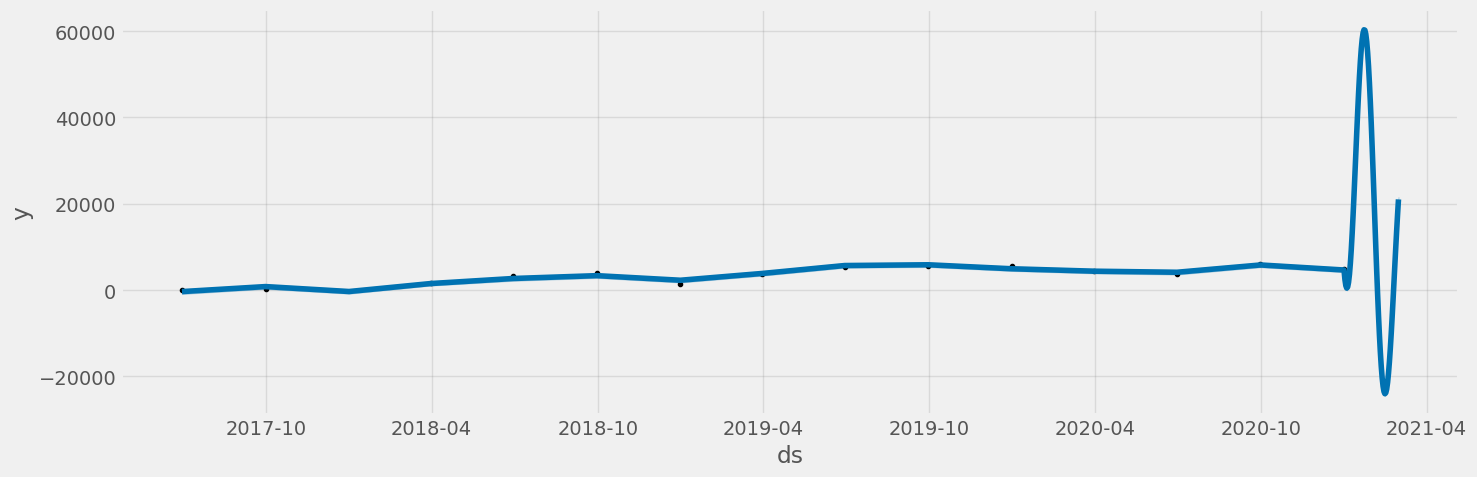

In [55]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(forecast,ax=ax)
plt.show()

In [56]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-01,32,3,2,6,2017,22
2017-07-01,315,5,3,7,2017,26
2018-01-01,2039,0,1,1,2018,1
2018-02-01,1440,3,1,2,2018,5
2018-03-01,1222,3,1,3,2018,9
2018-04-01,3428,6,2,4,2018,13
2018-05-01,1764,1,2,5,2018,18
2018-06-01,4293,4,2,6,2018,22
2018-07-01,11734,6,3,7,2018,26


In [63]:
strt='2019-12-31'
end='2020-02-26'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    np.random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(df_train)
    train_forecast = train_model.make_future_dataframe(periods=12, freq='M',include_history = False)
    start = train_forecast['ds'].min()
    end = train_forecast['ds'].max()
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']][:-1]
    Actual = df[(df.index>start) & (df.index<=end)]
    MAPE = mean_absolute_percentage_error(Actual['Order_Demand'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:22:34 - cmdstanpy - INFO - Chain [1] start processing
07:22:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 60.43390154735757
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:22:45 - cmdstanpy - INFO - Chain [1] start processing
07:22:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.736859600660209
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:22:49 - cmdstanpy - INFO - Chain [1] start processing
07:22:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 60.43390154735757
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:22:59 - cmdstanpy - INFO - Chain [1] start processing
07:23:03 - cmdstanpy - INFO - Chain [1] done processing
07:23:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.736859600660209
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:23:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 60.43390154735757
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:23:13 - cmdstanpy - INFO - Chain [1] start processing
07:23:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.736859600660209
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:23:17 - cmdstanpy - INFO - Chain [1] start processing
07:23:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 56.28341435933512
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:23:26 - cmdstanpy - INFO - Chain [1] start processing
07:23:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.73443931458344
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:23:29 - cmdstanpy - INFO - Chain [1] start processing
07:23:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 56.28341435933512
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:23:38 - cmdstanpy - INFO - Chain [1] start processing
07:23:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.73443931458344
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:23:40 - cmdstanpy - INFO - Chain [1] start processing
07:23:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 56.28341435933512
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:23:48 - cmdstanpy - INFO - Chain [1] start processing
07:23:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.73443931458344
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:23:51 - cmdstanpy - INFO - Chain [1] start processing
07:24:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 44.73712919244041
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:24:02 - cmdstanpy - INFO - Chain [1] start processing
07:24:03 - cmdstanpy - INFO - Chain [1] done processing
07:24:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 17.833462748416032
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:24:14 - cmdstanpy - INFO - Chain [1] done processing
07:24:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 44.73712919244041
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:24:16 - cmdstanpy - INFO - Chain [1] done processing
07:24:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 17.833462748416032
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:24:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 44.73712919244041
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:24:28 - cmdstanpy - INFO - Chain [1] start processing
07:24:30 - cmdstanpy - INFO - Chain [1] done processing
07:24:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 17.833462748416032
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:24:32 - cmdstanpy - INFO - Chain [1] done processing
07:24:32 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 51.818062425519265
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:24:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 27.794304551012477
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:24:35 - cmdstanpy - INFO - Chain [1] start processing
07:24:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 51.818062425519265
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:24:37 - cmdstanpy - INFO - Chain [1] start processing
07:24:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 27.794304551012477
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:24:40 - cmdstanpy - INFO - Chain [1] start processing
07:24:41 - cmdstanpy - INFO - Chain [1] done processing
07:24:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 51.818062425519265
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:24:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 27.794304551012477
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:24:44 - cmdstanpy - INFO - Chain [1] start processing
07:24:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 42.961621886567315
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:24:56 - cmdstanpy - INFO - Chain [1] start processing
07:24:58 - cmdstanpy - INFO - Chain [1] done processing
07:24:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.811017145528666
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:25:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 42.961621886567315
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:25:10 - cmdstanpy - INFO - Chain [1] start processing
07:25:13 - cmdstanpy - INFO - Chain [1] done processing
07:25:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.811017145528666
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:25:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 42.961621886567315
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:25:24 - cmdstanpy - INFO - Chain [1] start processing
07:25:27 - cmdstanpy - INFO - Chain [1] done processing
07:25:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.811017145528666
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:25:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.40663560563834
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:25:59 - cmdstanpy - INFO - Chain [1] start processing
07:26:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.55178862752192
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:26:05 - cmdstanpy - INFO - Chain [1] start processing
07:26:35 - cmdstanpy - INFO - Chain [1] done processing
07:26:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.40663560563834
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:26:41 - cmdstanpy - INFO - Chain [1] done processing
07:26:42 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.55178862752192
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:27:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.40663560563834
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:27:07 - cmdstanpy - INFO - Chain [1] start processing
07:27:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.55178862752192
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:27:11 - cmdstanpy - INFO - Chain [1] start processing
07:27:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.927813343510844
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:27:41 - cmdstanpy - INFO - Chain [1] start processing
07:27:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 16.45999725290662
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:27:52 - cmdstanpy - INFO - Chain [1] start processing
07:28:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.927813343510844
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:28:28 - cmdstanpy - INFO - Chain [1] start processing
07:28:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 16.45999725290662
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:28:42 - cmdstanpy - INFO - Chain [1] start processing
07:29:15 - cmdstanpy - INFO - Chain [1] done processing
07:29:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.927813343510844
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:29:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 16.45999725290662
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:29:27 - cmdstanpy - INFO - Chain [1] start processing
07:29:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.516254614172897
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:29:52 - cmdstanpy - INFO - Chain [1] start processing
07:30:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 10.115110191304055
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:30:02 - cmdstanpy - INFO - Chain [1] start processing
07:30:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.516254614172897
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:30:30 - cmdstanpy - INFO - Chain [1] start processing
07:30:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 10.115110191304055
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:30:42 - cmdstanpy - INFO - Chain [1] start processing
07:31:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.516254614172897
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:31:21 - cmdstanpy - INFO - Chain [1] start processing
07:31:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 10.115110191304055
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:31:35 - cmdstanpy - INFO - Chain [1] start processing
07:32:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 10.111880244166171
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:32:07 - cmdstanpy - INFO - Chain [1] start processing
07:32:10 - cmdstanpy - INFO - Chain [1] done processing
07:32:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.646875251551577
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:32:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 10.111880244166171
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:32:39 - cmdstanpy - INFO - Chain [1] start processing
07:32:41 - cmdstanpy - INFO - Chain [1] done processing
07:32:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.646875251551577
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:33:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 10.111880244166171
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:33:10 - cmdstanpy - INFO - Chain [1] start processing
07:33:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.646875251551577
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:33:13 - cmdstanpy - INFO - Chain [1] start processing
07:33:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 24.118953561032196
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:33:51 - cmdstanpy - INFO - Chain [1] start processing
07:33:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.821074066266027
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:33:57 - cmdstanpy - INFO - Chain [1] start processing
07:34:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 24.118953561032196
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:34:34 - cmdstanpy - INFO - Chain [1] start processing
07:34:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.821074066266027
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:34:38 - cmdstanpy - INFO - Chain [1] start processing
07:35:06 - cmdstanpy - INFO - Chain [1] done processing
07:35:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 24.118953561032196
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:35:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.821074066266027
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:35:10 - cmdstanpy - INFO - Chain [1] start processing
07:35:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 5.435922074621865
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:35:30 - cmdstanpy - INFO - Chain [1] start processing
07:36:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 9.446588452738466
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:36:04 - cmdstanpy - INFO - Chain [1] start processing
07:36:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 5.435922074621865
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:36:30 - cmdstanpy - INFO - Chain [1] start processing
07:37:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 9.446588452738466
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:37:01 - cmdstanpy - INFO - Chain [1] start processing
07:37:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 5.435922074621865
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:37:20 - cmdstanpy - INFO - Chain [1] start processing
07:37:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 9.446588452738466
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:37:42 - cmdstanpy - INFO - Chain [1] start processing
07:37:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.669130809831414
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:37:47 - cmdstanpy - INFO - Chain [1] start processing
07:38:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 19.474728812729076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:38:10 - cmdstanpy - INFO - Chain [1] start processing
07:38:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.669130809831414
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:38:15 - cmdstanpy - INFO - Chain [1] start processing
07:38:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 19.474728812729076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:38:41 - cmdstanpy - INFO - Chain [1] start processing
07:38:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.669130809831414
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:38:48 - cmdstanpy - INFO - Chain [1] start processing
07:39:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 19.474728812729076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:39:16 - cmdstanpy - INFO - Chain [1] start processing
07:39:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.85156283679806
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:39:50 - cmdstanpy - INFO - Chain [1] start processing
07:39:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 33.490018159177374
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:39:54 - cmdstanpy - INFO - Chain [1] start processing
07:40:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.85156283679806
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:40:24 - cmdstanpy - INFO - Chain [1] start processing
07:40:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 33.490018159177374
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:40:28 - cmdstanpy - INFO - Chain [1] start processing
07:40:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.85156283679806
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:40:56 - cmdstanpy - INFO - Chain [1] start processing
07:41:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 33.490018159177374
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:41:00 - cmdstanpy - INFO - Chain [1] start processing
07:41:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.1104321513377866
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:41:34 - cmdstanpy - INFO - Chain [1] start processing
07:41:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.56354121725842
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:41:48 - cmdstanpy - INFO - Chain [1] start processing
07:42:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.1104321513377866
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:42:30 - cmdstanpy - INFO - Chain [1] start processing
07:42:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.56354121725842
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:42:39 - cmdstanpy - INFO - Chain [1] start processing
07:43:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.1104321513377866
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:43:09 - cmdstanpy - INFO - Chain [1] start processing
07:43:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.56354121725842
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:43:19 - cmdstanpy - INFO - Chain [1] start processing
07:43:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.596746953052616
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:43:38 - cmdstanpy - INFO - Chain [1] start processing
07:44:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 14.730592446014288
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:44:17 - cmdstanpy - INFO - Chain [1] start processing
07:44:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.596746953052616
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:44:43 - cmdstanpy - INFO - Chain [1] start processing
07:45:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 14.730592446014288
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:45:16 - cmdstanpy - INFO - Chain [1] start processing
07:45:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.596746953052616
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:45:36 - cmdstanpy - INFO - Chain [1] start processing
07:46:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 14.730592446014288
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:46:08 - cmdstanpy - INFO - Chain [1] start processing
07:46:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.090786473991352
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:46:40 - cmdstanpy - INFO - Chain [1] start processing
07:47:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.85335514118739
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:47:08 - cmdstanpy - INFO - Chain [1] start processing
07:47:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.090786473991352
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:47:34 - cmdstanpy - INFO - Chain [1] start processing
07:48:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.85335514118739
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:48:01 - cmdstanpy - INFO - Chain [1] start processing
07:48:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.090786473991352
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:48:30 - cmdstanpy - INFO - Chain [1] start processing
07:49:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.85335514118739
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:49:10 - cmdstanpy - INFO - Chain [1] start processing
07:49:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 30.087047654715057
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:49:44 - cmdstanpy - INFO - Chain [1] start processing
07:50:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 26.399517367167345
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:50:12 - cmdstanpy - INFO - Chain [1] start processing
07:50:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 30.087047654715057
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:50:41 - cmdstanpy - INFO - Chain [1] start processing
07:51:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 26.399517367167345
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:51:19 - cmdstanpy - INFO - Chain [1] start processing
07:51:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 30.087047654715057
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:51:51 - cmdstanpy - INFO - Chain [1] start processing
07:52:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 26.399517367167345
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:52:16 - cmdstanpy - INFO - Chain [1] start processing
07:52:43 - cmdstanpy - INFO - Chain [1] done processing
07:52:43 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.143971446159245
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:53:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.212579283977462
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:53:11 - cmdstanpy - INFO - Chain [1] start processing
07:53:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.143971446159245
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:53:44 - cmdstanpy - INFO - Chain [1] start processing
07:54:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.212579283977462
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:54:19 - cmdstanpy - INFO - Chain [1] start processing
07:54:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.143971446159245
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:54:54 - cmdstanpy - INFO - Chain [1] start processing
07:55:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.212579283977462
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:55:21 - cmdstanpy - INFO - Chain [1] start processing
07:55:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.52813720584368
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:55:29 - cmdstanpy - INFO - Chain [1] start processing
07:55:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.157539678185863
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:55:48 - cmdstanpy - INFO - Chain [1] start processing
07:55:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.52813720584368
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:55:56 - cmdstanpy - INFO - Chain [1] start processing
07:56:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.157539678185863
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:56:17 - cmdstanpy - INFO - Chain [1] start processing
07:56:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 18.52813720584368
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:56:27 - cmdstanpy - INFO - Chain [1] start processing
07:56:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 15.157539678185863
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:56:54 - cmdstanpy - INFO - Chain [1] start processing
07:57:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.014332274089012
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:57:28 - cmdstanpy - INFO - Chain [1] start processing
07:57:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.84788976704929
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


07:57:43 - cmdstanpy - INFO - Chain [1] start processing
07:58:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.014332274089012
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


07:58:11 - cmdstanpy - INFO - Chain [1] start processing
07:58:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.84788976704929
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


07:58:29 - cmdstanpy - INFO - Chain [1] start processing
07:59:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.014332274089012
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


07:59:04 - cmdstanpy - INFO - Chain [1] start processing
07:59:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.84788976704929
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


07:59:22 - cmdstanpy - INFO - Chain [1] start processing
07:59:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.432770632337553
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


07:59:50 - cmdstanpy - INFO - Chain [1] start processing
08:00:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.0313816400731675
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:00:18 - cmdstanpy - INFO - Chain [1] start processing
08:00:42 - cmdstanpy - INFO - Chain [1] done processing
08:00:42 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.432770632337553
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:01:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.0313816400731675
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:01:10 - cmdstanpy - INFO - Chain [1] start processing
08:01:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.432770632337553
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:01:40 - cmdstanpy - INFO - Chain [1] start processing
08:02:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.0313816400731675
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:02:12 - cmdstanpy - INFO - Chain [1] start processing
08:02:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 19.17203836279384
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:02:38 - cmdstanpy - INFO - Chain [1] start processing
08:03:03 - cmdstanpy - INFO - Chain [1] done processing
08:03:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.047866094695557
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:03:29 - cmdstanpy - INFO - Chain [1] done processing
08:03:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 19.17203836279384
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:04:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.047866094695557
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:04:00 - cmdstanpy - INFO - Chain [1] start processing
08:04:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 19.17203836279384
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:04:33 - cmdstanpy - INFO - Chain [1] start processing
08:05:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.047866094695557
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:05:04 - cmdstanpy - INFO - Chain [1] start processing
08:05:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.560186305993694
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:05:33 - cmdstanpy - INFO - Chain [1] start processing
08:06:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.6963304498879834
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:06:00 - cmdstanpy - INFO - Chain [1] start processing
08:06:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.560186305993694
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:06:38 - cmdstanpy - INFO - Chain [1] start processing
08:07:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.6963304498879834
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:07:12 - cmdstanpy - INFO - Chain [1] start processing
08:07:41 - cmdstanpy - INFO - Chain [1] done processing
08:07:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.560186305993694
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:08:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.6963304498879834
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:08:06 - cmdstanpy - INFO - Chain [1] start processing
08:08:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 9.523150403144673
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:08:33 - cmdstanpy - INFO - Chain [1] start processing
08:09:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 25.14957980564683
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:09:03 - cmdstanpy - INFO - Chain [1] start processing
08:09:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 9.523150403144673
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:09:45 - cmdstanpy - INFO - Chain [1] start processing
08:10:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 25.14957980564683
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:10:16 - cmdstanpy - INFO - Chain [1] start processing
08:10:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 9.523150403144673
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:10:44 - cmdstanpy - INFO - Chain [1] start processing
08:11:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 25.14957980564683
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:11:13 - cmdstanpy - INFO - Chain [1] start processing
08:11:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.75495639549118
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:11:40 - cmdstanpy - INFO - Chain [1] start processing
08:12:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 6.451001057287029
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:12:11 - cmdstanpy - INFO - Chain [1] start processing
08:12:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.75495639549118
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:12:42 - cmdstanpy - INFO - Chain [1] start processing
08:13:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 6.451001057287029
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:13:09 - cmdstanpy - INFO - Chain [1] start processing
08:13:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.75495639549118
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:13:34 - cmdstanpy - INFO - Chain [1] start processing
08:13:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 6.451001057287029


In [64]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,3.110432,"{'changepoint_prior_scale': 0.3, 'holidays_pri..."
1,3.110432,"{'changepoint_prior_scale': 0.3, 'holidays_pri..."
2,3.110432,"{'changepoint_prior_scale': 0.3, 'holidays_pri..."
3,3.696330,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."
4,3.696330,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."


In [65]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.3,
 'holidays_prior_scale': 0.4,
 'n_changepoints': 100,
 'seasonality_mode': 'multiplicative'}